# 线性回归

## 【关键词】最小二乘法，线性

## 一、普通线性回归

### 1、原理

分类的目标变量是标称型数据，而回归将会对连续型的数据做出预测。

应当怎样从一大堆数据里求出回归方程呢？

假定输人数据存放在矩阵X中，而回归系数存放在向量W中。那么对于给定的数据X1, 预测结果将会通过

Y=X*W

给出。现在的问题是，手里有一些X和对应的Y,怎样才能找到W呢？

一个常用的方法就是找出使误差最小的W。这里的误差是指预测Y值和真实Y值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我
们采用平方误差。

最小二乘法

平方误差可以写做:

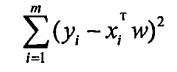

对W求导，当导数为零时，平方误差最小，此时W等于：

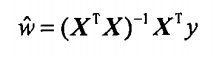

例如有下面一张图片：

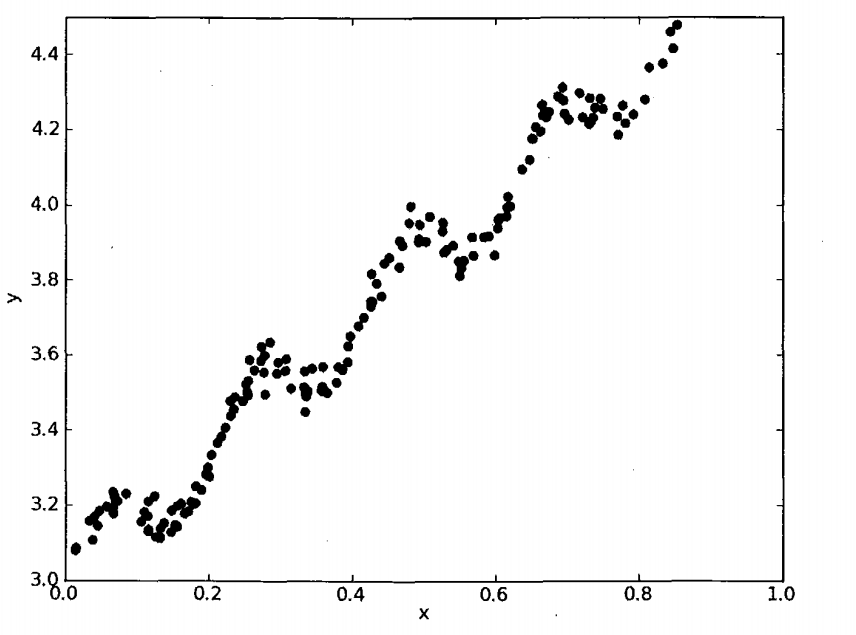

求回归曲线，得到：

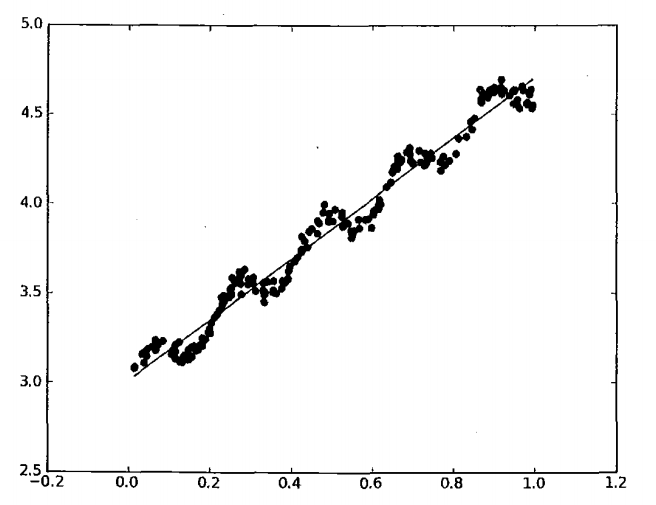

In [ ]:
x^2 + y^2 = z^2

#费马大定理
x^n + y^n = z^n
n>=3

x y z != 1\0 

### 2、实例

导包

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import sklearn.datasets as datasets

获取糖尿病数据

In [2]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
x_data = diabetes.data
y_target = diabetes.target

In [4]:
y_target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

抽取训练数据和预测数据

In [5]:
x_data.shape

(442, 10)

In [6]:
#获取索引是2的属性进行研究
# x_data[:,2,np.newaxis] == reshape()
X_train = x_data[:,2,np.newaxis]

In [7]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test = train_test_split(X_train,y_target,test_size = 0.05)

In [8]:
X_train.shape

(419, 1)

创建数学模型

In [9]:
lrg = LinearRegression()

第一步：训练

In [10]:
lrg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: x and y must be the same size

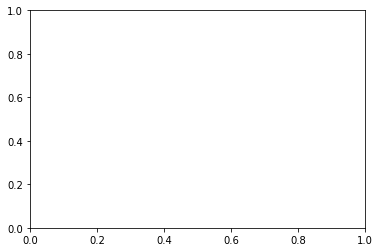

In [12]:
plt.scatter(X_train,y_target)

第二步：预测

In [13]:
y_ = lrg.predict(x_test)

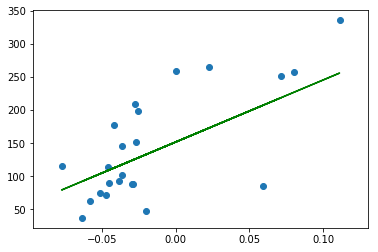

In [14]:
plt.scatter(x_test,y_test)

plt.plot(x_test,y_,'green')

#KNN 回归有什么区别
#结果，过程不同
#KNN k近邻算法 ，最近的几个点生成预测的数据
#线性回归：最小二乘法

## 二、岭回归

In [15]:
from sklearn.linear_model import Ridge

### 1、原理

缩减系数来“理解”数据 不重要的特征弱化

In [24]:
x_data.shape
#442 样本；10，特征，或者属性

(442, 10)

In [16]:
x_data = x_data.reshape((10,442))
x_data.shape

#10 个样本，442 个属性 （10个方程 442元方程）
#442 属性，关键属性

(10, 442)

In [ ]:
x + y = 2

2x + 3y = 6

#满秩矩阵
1 1
2 3

1 1
0 1

1 0
0 1

x + y = 2 

2x + 2y = 4

1 1 
2 2

1 1 
0 0

In [27]:
a.shape

(3, 3)

In [17]:
X_train = np.array([[3,3.5,2],[3.2,3.6,3],[6.6,7,4]])
#查看秩
np.linalg.matrix_rank(X_train)

#值
y_train = np.array([1,2,3])

In [ ]:
3x + 3.2y + 6.6z = 1

3.5x + 3.6y + 7z = 2

2x + 3y + 4z = 3

In [ ]:
[x1,x2]*[[3,3.5],[3.2,3.6]] = [118.4,135.2]

In [ ]:
[x1,x2]*[[3,3.5],[3.2,3.6]]*price_ = [118.4,135.2]*price_

[x1,x2]*I = [118.4,135.2]*price_

[x1,x2] = [118.4,135.2]*price_

In [18]:
price = np.array([[3,3.5],[3.2,3.6]])

total_price = np.array([118.4,135.2])

#求解price的逆矩阵
price_ = np.linalg.inv(price)

In [19]:
price_

array([[-9.  ,  8.75],
       [ 8.  , -7.5 ]])

In [20]:
np.dot(total_price,price_)

#16个小孩，22个大人

array([16., 22.])

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？

答案是否定的，即不能再使用前面介绍的方法。这是因为输入数据的矩阵X不是满秩矩阵。非满秩矩阵在求逆时会出现问题。

为了解决这个问题，统计学家引入了岭回归（ridge regression)的概念

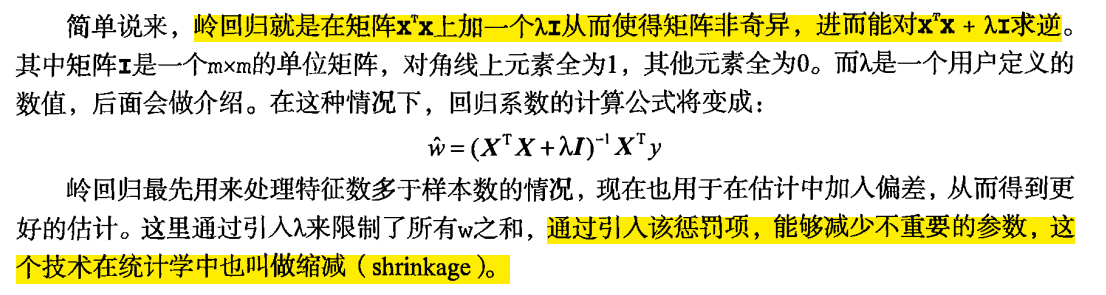

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

岭回归是加了二阶正则项的最小二乘，主要适用于过拟合严重或各变量之间存在多重共线性的时候，岭回归是有bias的，这里的bias是为了让variance更小。

In [ ]:
#统计时候，统计身高，三列，三个属性，sg1，sg2，sg3，身高，身长，身宽
#共线性
#去重

#### 归纳总结

1.岭回归可以解决特征数量比样本量多的问题

2.岭回归作为一种缩减算法可以判断哪些特征重要或者不重要，有点类似于降维的效果

3.缩减算法可以看作是对一个模型增加偏差的同时减少方差

岭回归用于处理下面两类问题：

1.数据点少于变量个数

2.变量间存在共线性（最小二乘回归得到的系数不稳定，方差很大）

### 2、实例

岭回归一般用在样本值不够的时候

In [39]:
#10 个方程，30个未知数
X_train = np.random.randint(0,100,size = (10,30))

y_train = np.random.randint(0,10,size = 10)

使用普通线性回归

In [40]:
lrg = LinearRegression()
lrg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
x_test = X_train[::2]
y_test = y_train[::2]

In [42]:
lrg.predict(x_test)

array([3.00000000e+00, 1.33226763e-15, 4.00000000e+00, 3.00000000e+00,
       4.00000000e+00])

In [43]:
y_test

array([3, 0, 4, 3, 4])

使用岭回归

In [44]:
#lamada*I 二阶正则项
#alpha == 0 Ridge 就是LinearRegressor
ridge = Ridge(alpha=1)

ridge.fit(X_train,y_train)

ridge.predict(x_test)

array([2.99998159e+00, 3.41928451e-04, 3.99993488e+00, 3.00000752e+00,
       3.99987469e+00])

In [45]:
lrg.coef_

array([ 0.0205088 , -0.01747378, -0.01356764, -0.0012946 ,  0.00233759,
        0.01067772, -0.0002323 ,  0.00455552, -0.01778331, -0.00924289,
        0.00650817, -0.0003759 , -0.00583557,  0.01039885,  0.00386049,
        0.00575993, -0.00238129,  0.00333338,  0.00584714,  0.00224588,
       -0.00658516, -0.00478579, -0.00099536, -0.0090624 ,  0.00590795,
       -0.00747778,  0.00339261,  0.00056777,  0.00106093,  0.00045349])

In [46]:
ridge.coef_

array([ 0.02112887, -0.01674502, -0.0137826 , -0.001682  ,  0.00293219,
        0.01127526, -0.00024167,  0.00045826, -0.015961  , -0.00996781,
        0.00624403,  0.00209059, -0.00576294,  0.01052754,  0.00445221,
        0.00635294, -0.00269093,  0.00388331,  0.00543455,  0.00157037,
       -0.00615912, -0.00521961, -0.00136104, -0.00967216,  0.00634039,
       -0.00597752,  0.00300992,  0.00157688,  0.00080998,  0.00032762])

In [47]:
y_test

array([3, 0, 4, 3, 4])

In [50]:
X.shape

(10, 10)

In [51]:
X

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [60]:
np.logspace(0,2,10)

array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ])

In [59]:
(np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

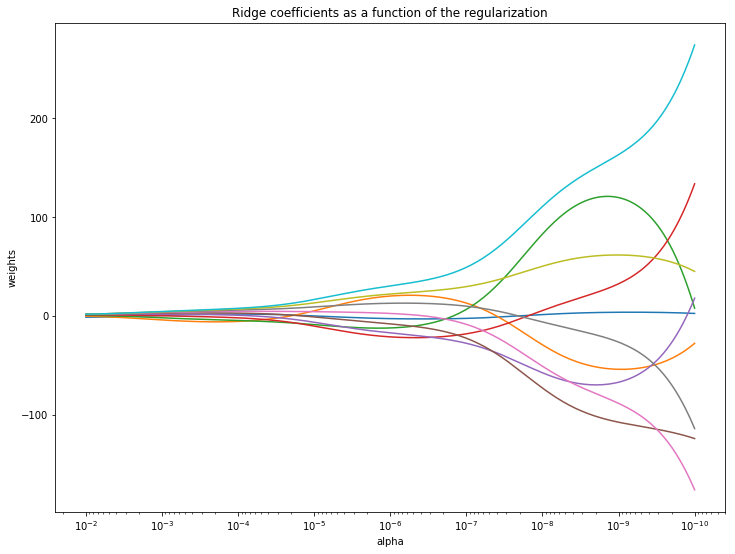

In [49]:
#岭迹线 中间的线不重要 给不同的α波动都不大

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
#10元一次方成
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

#结果，方程的结果值
y = np.ones(10)

###############################################################################
# Compute paths

#设置200个alpha---->200 coef_ 比重
n_alphas = 200
#0.00000000001 ~ 0.01 之间选取200个数
alphas = np.logspace(-10, -2, n_alphas)

#intercept 截距 不考虑截距 求得是绝对值 如果给截距是相对值 相对坐标零点
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    #动态设置alpha
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results
plt.figure(figsize=(12,9))
#获取当前的画面
#get current axes
ax = plt.gca()


ax.plot(alphas, coefs)
#坐标轴刻度显示的单位 log
ax.set_xscale('log')

#limit xmin xmax 坐标刻度进行了反转
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## 三、lasso回归

In [61]:
import numpy as np

#Lasso 回归就是一种线性回归
from sklearn.linear_model import Lasso

### 1、原理

【拉格朗日乘数法】

对于参数w增加一个限定条件，能到达和岭回归一样的效果：

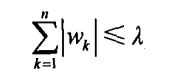

在lambda足够小的时候，一些系数会因此被迫缩减到0

In [4]:
lasso = Lasso(alpha=1)

In [62]:
import sklearn.datasets as datasets

In [64]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [68]:
x_data = boston.data
y_target = boston.target

In [69]:
from sklearn.model_selection import train_test_split

In [67]:
x_data.shape

(10, 442)

In [9]:
y_target.shape

(506,)

In [70]:
X_train,x_test,y_train,y_test = train_test_split(x_data,y_target,test_size = 0.05)

In [79]:
#生成模型，算法，估计 estimator

lasso_estimator = Lasso(alpha= 1)

#训练数据
lasso_estimator.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
#预测数据
#lasso alpha == 0 那么Lasso == LinearRegressor
y_ = lasso_estimator.predict(x_test)
y_

array([24.11395295, 24.55956003, 17.97804838, 21.83425865, 23.29590269,
       20.64814949, 25.64794573, 19.55279575, 29.79306371, 16.64019822,
        8.01097352, 23.422547  , 24.41315132, 18.57565418, 23.98534435,
       26.58167108, 19.39298497, 34.54560839, 19.41891086, 18.69159635,
       26.83040992, 35.0037657 , 13.95433259, 28.07475787, 22.82511289,
       30.40696341])

In [74]:
y_test

array([24.2, 20.6, 14.1, 22.5, 23.4, 21.4, 21.6, 14.2, 23.6, 13. , 14.4,
       24.4, 23.9, 19.5, 21.1, 22.6, 20.6, 50. , 20.2, 18. , 42.8, 50. ,
       12.7, 23.7, 21.2, 24.3])

In [75]:
from sklearn.linear_model import LinearRegression

lrg_estimator = LinearRegression()

lrg_estimator.fit(X_train,y_train)
y_ = lrg_estimator.predict(x_test)
y_

array([24.88627949, 22.63027025, 17.52900227, 22.17573222, 23.76689534,
       20.25811106, 25.04181132, 18.30777329, 30.81671942, 17.15415578,
        8.91816863, 23.55220148, 24.72646924, 18.9300154 , 20.52147618,
       27.31349146, 19.38918957, 40.44723099, 16.38181727, 18.90064964,
       28.90824579, 40.05585632, 12.76984257, 28.28710634, 23.52975257,
       29.37001327])

### 2、实例

## 四、普通线性回归、岭回归与lasso回归比较

导包，导入sklearn.metrics.r2_score用于给模型打分

In [80]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

使用numpy创建数据X，创建系数，对系数进行处理，对部分系数进行归零化操作，然后根据系数进行矩阵操作求得目标值  
增加噪声

In [81]:
#创建数据
#数据的样本量 50个，属性 200个
sample = 50
feture = 200

x_data = np.random.randn(sample,feture)
x_data.shape

(50, 200)

In [82]:
#y_target,目标值
#200元的方程
# y_target = w*x_data

#生成系数 和x_data 做矩阵乘法获取了y

coef = np.random.randn(feture)

# coef 中190个设置为0，只剩下10个，随机选取
# a = np.array([1,2,4,5,6])
inds = np.arange(0,200)
np.random.shuffle(inds)

In [83]:
coef[inds[:190]] = 0

In [86]:
coef

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -1.2083505 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.34012496,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.5522531 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [88]:
y_target = np.dot(x_data,coef)
y_target.shape

(50,)

In [89]:
#添加噪声
y_target += 0.01*np.random.randn(sample)

In [91]:
X_train,x_test,y_train,y_test = train_test_split(x_data,y_target,test_size = 0.2)

训练数据和测试数据

分别使用线性回归，岭回归，Lasso回归进行数据预测

In [97]:
lrg = LinearRegression()
lrg.fit(X_train,y_train)
lrg.score(x_test,y_test)

0.12489944730352431

In [104]:
ridge = Ridge(alpha= 0.2)
ridge.fit(X_train,y_train)
ridge.score(x_test,y_test)

0.1382031090580268

In [105]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso.score(x_test,y_test)

0.7127784728613591

数据视图，此处获取各个算法的训练数据的coef_:系数

In [106]:
#方程的解
lrg.coef_

array([-0.03103073,  0.01139506, -0.07332176,  0.05428901, -0.0543996 ,
       -0.14174622,  0.10145492,  0.13377719,  0.07013426,  0.02109367,
        0.10658936, -0.11938947, -0.01959062,  0.00853846, -0.00121623,
        0.26544784,  0.02634705,  0.02813918,  0.06276228, -0.09452595,
       -0.02518169,  0.02868102,  0.11651601,  0.00220162,  0.02455859,
        0.0260965 ,  0.171649  ,  0.02811107, -0.08546266,  0.05477345,
       -0.04782539, -0.07619417, -0.03855916, -0.0153171 ,  0.01037714,
        0.07169636, -0.17387854,  0.04904178, -0.07773043, -0.00555172,
        0.00136316, -0.16404609, -0.09910076, -0.12517   ,  0.02850844,
        0.05299098,  0.02560505,  0.0406174 ,  0.11087259,  0.05588223,
       -0.03228051,  0.0164    ,  0.07273462, -0.0511988 , -0.04317907,
        0.04040963, -0.08239889, -0.00380709, -0.00734781,  0.19886333,
       -0.03803376, -0.0921581 , -0.00660978, -0.1181924 , -0.01686011,
        0.02376466,  0.01044511,  0.04611157,  0.09433864, -0.01

In [107]:
#截距
lrg.intercept_

-0.03473564727274259

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

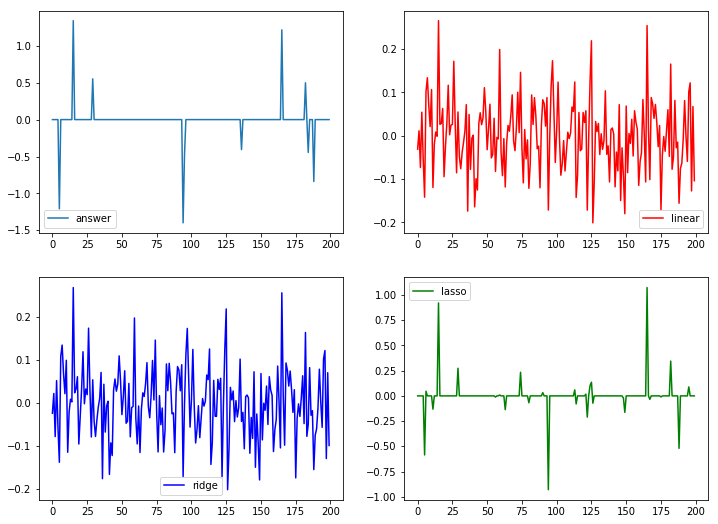

In [109]:
plt.figure(figsize=(12,9))

axes1 = plt.subplot(221)
#绘制自己创建的coef系数，标准答案
axes1.plot(coef,label = 'answer')
plt.legend()



axes2 = plt.subplot(222)
#绘制自己创建的coef系数，标准答案
axes2.plot(lrg.coef_,label = 'linear',color = 'r')
plt.legend()


axes3 = plt.subplot(223)
#绘制自己创建的coef系数，标准答案
axes3.plot(ridge.coef_,label = 'ridge',color = 'b')
plt.legend()


axes4 = plt.subplot(224)
#绘制自己创建的coef系数，标准答案
axes4.plot(lasso.coef_,label = 'lasso',color = 'g')
plt.legend()

## 五、练习

### 1、使用多种方法对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

`
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
`

### 2、预测鲍鱼的年龄

abalone.txt